# Como optimizamos un modelo

Vamos a trabajar con el dataset de paltas. Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
#Seleccion de modelo y train split
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV,
    RandomizedSearchCV
)
#metricas
from sklearn.metrics import mean_squared_error

### Carga de datos

a. Abrir el dataset (`avocado.csv`). Parsear fechas con la columna "Date".

In [4]:
palta = pd.read_csv('avocado.csv', delimiter=',', parse_dates=["Date"], index_col=0)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


b. Ordenar el dataframe de manera creciente por fecha.  
c. Resetear los índices del Dataframe

In [5]:
palta.sort_values("Date", inplace=True)
palta.reset_index(inplace=True, drop=True)

### Análisis exploratorio de datos

Vamos a seleccionar solo las paltas correspondientes a la región de Chicago.

In [6]:
palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace=True, drop=True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


Tipo de variables. Valores faltantes.

In [7]:
palta_chicago.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [8]:
palta_chicago.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Pasar fechas a números

A veces, en lugar de trabajar con fechas, es más fácil pasarlas a un número representativo.

In [9]:
palta_chicago['Date'] = palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


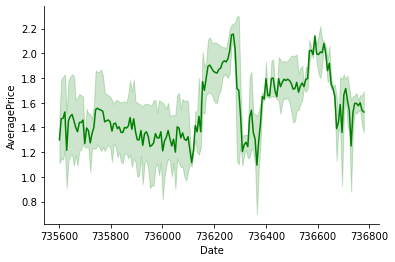

In [10]:
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, color='green')
sns.despine()

### Regresión

#### Arboles de decisión

In [11]:
palta_chicago.type = palta_chicago.type.map({'conventional': 0, 'organic': 1})

Asignamos **X</span>** e **Y</span>**

In [12]:
x = palta_chicago[['Date', 'Total Volume', 'type']]

In [13]:
y = palta_chicago['AveragePrice']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, 
                                                    random_state = 42)

In [15]:
rgr_tree = DecisionTreeRegressor(criterion='mse',max_depth=5, random_state=42)

rgr_tree.fit(X_train, Y_train);

In [16]:
y_predicted_train = rgr_tree.predict(X_train)

In [17]:
y_predicted_test = rgr_tree.predict(X_test)

In [18]:
print('Error en datos de train:', mean_squared_error(Y_train, y_predicted_train)**0.5)
print('Error en datos de test:', mean_squared_error(Y_test, y_predicted_test)**0.5)

Error en datos de train: 0.09800322861598001
Error en datos de test: 0.11855946683239155


### Optimización del modelo

[Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [20]:
parameters_optimize = {
    'criterion':['mae', 'mse'], 
    'max_depth':[2,5,7,10,15,20]
}

In [21]:
tree_grid = DecisionTreeRegressor(random_state=42)

tree_search = GridSearchCV(tree_grid,
                                   cv = 5,
                                   param_grid = parameters_optimize,
                                   return_train_score=True)
tree_search.fit(X_train, Y_train);

In [22]:
results = pd.DataFrame(tree_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004100,0.001692,0.002524,0.000833,mae,2,"{'criterion': 'mae', 'max_depth': 2}",0.724409,0.608085,0.581987,...,0.585551,0.093762,12,0.616156,0.669323,0.656772,0.653679,0.626927,0.644572,0.019815
1,0.004322,0.000968,0.002189,0.000969,mae,5,"{'criterion': 'mae', 'max_depth': 5}",0.799083,0.755643,0.671290,...,0.749400,0.050785,10,0.834226,0.897416,0.876541,0.913752,0.899453,0.884278,0.027701
2,0.003626,0.000086,0.001542,0.000037,mae,7,"{'criterion': 'mae', 'max_depth': 7}",0.838002,0.655590,0.796731,...,0.768618,0.064286,9,0.952626,0.970559,0.953632,0.962440,0.951528,0.958157,0.007310
3,0.003731,0.000077,0.001522,0.000032,mae,10,"{'criterion': 'mae', 'max_depth': 10}",0.809574,0.726088,0.811006,...,0.779617,0.030979,7,0.989324,0.996271,0.991466,0.987246,0.996218,0.992105,0.003634
4,0.003840,0.000257,0.001564,0.000100,mae,15,"{'criterion': 'mae', 'max_depth': 15}",0.836558,0.736111,0.820215,...,0.797138,0.036764,5,0.999978,0.999991,0.999944,0.999892,1.000000,0.999961,0.000040


In [23]:
print(tree_search.best_estimator_)
print(tree_search.best_score_)

DecisionTreeRegressor(max_depth=7, random_state=42)
0.8252947673774462


In [24]:
print('The best parameteres after GridSearchCV', tree_search.best_params_)

The best parameteres after GridSearchCV {'criterion': 'mse', 'max_depth': 7}


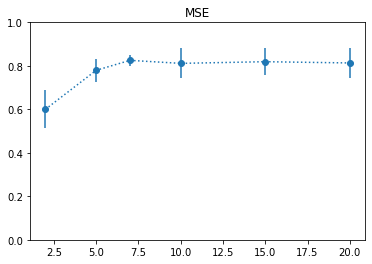

In [25]:
mask_mse = results.param_criterion == 'mse'

plt.figure(0)
plt.title('MSE')
plt.ylim(0,1)
plt.errorbar(x=results[mask_mse].param_max_depth, y=results[mask_mse].mean_test_score,yerr=results[mask_mse].std_test_score,fmt='o:');

In [26]:
best_tree = DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best');

In [27]:
best_tree.fit(X_train, Y_train);

In [28]:
y_predicted_grid = best_tree.predict(X_test)

In [29]:
print('Error en datos de test:', mean_squared_error(Y_test, y_predicted_grid)**0.5)

Error en datos de test: 0.11273205739227701


[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

In [30]:
from scipy.stats import randint

In [31]:
parameters_optimize_rand = {
    'criterion': ['mse', 'mae'],
    'max_depth': randint(1, 20),
    'min_samples_leaf': randint(1, 20),
    'max_leaf_nodes': randint(2, 20)
}

In [32]:
tree_random = DecisionTreeRegressor(random_state=42)

In [33]:
tree_search_random = RandomizedSearchCV(tree_random, 
                           param_distributions=parameters_optimize_rand,
                            cv=5)

In [34]:
tree_search_random.fit(X_train, Y_train);

In [35]:
results_random = pd.DataFrame(tree_search_random.cv_results_)
results_random.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003214,0.000605,0.001730,0.000087,mse,7,11,3,"{'criterion': 'mse', 'max_depth': 7, 'max_leaf...",0.773790,0.629537,0.793202,0.696162,0.726914,0.723921,0.058266,3
1,0.003033,0.000235,0.002130,0.000393,mse,15,16,11,"{'criterion': 'mse', 'max_depth': 15, 'max_lea...",0.749915,0.675525,0.731684,0.670308,0.643707,0.694228,0.039946,5
2,0.003477,0.000309,0.001651,0.000185,mae,9,7,11,"{'criterion': 'mae', 'max_depth': 9, 'max_leaf...",0.753396,0.672453,0.571543,0.660820,0.532364,0.638115,0.078230,8
3,0.002121,0.000011,0.001397,0.000033,mse,3,16,11,"{'criterion': 'mse', 'max_depth': 3, 'max_leaf...",0.778398,0.681117,0.597514,0.534849,0.580205,0.634417,0.086170,9
4,0.002154,0.000121,0.001388,0.000070,mse,10,19,17,"{'criterion': 'mse', 'max_depth': 10, 'max_lea...",0.804383,0.638045,0.623893,0.612214,0.617713,0.659249,0.073077,6


In [36]:
print(tree_search_random.best_estimator_)
print(tree_search_random.best_score_)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=16, min_samples_leaf=5,
                      random_state=42)
0.7629367200333249


In [37]:
best_tree_random = DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=15, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best');

In [38]:
best_tree_random.fit(X_train, Y_train);

In [39]:
y_predicted_random = best_tree_random.predict(X_test)

In [40]:
print('Error en datos de test:', mean_squared_error(Y_test, y_predicted_random)**0.5)

Error en datos de test: 0.13794898140059053
